In [1]:
import pickle

import cartopy.crs as ccrs
import cartopy.geodesic as cgeo
import cartopy.vector_transform as cvt
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
grid_angle_file = "/home/ubuntu/ONavScripts/rotate_caps/test.nc"
x_vel_file = "/home/ubuntu/ONavScripts/rotate_caps/caps/20250711T00Z_MSC_CAPS_SeaWaterVelocityX_DBS-0.5m_RLatLon0.03_PT001H.nc"
y_vel_file = "/home/ubuntu/ONavScripts/rotate_caps/caps/20250711T00Z_MSC_CAPS_SeaWaterVelocityY_DBS-0.5m_RLatLon0.03_PT001H.nc"

# proj = ccrs.NorthPolarStereo(central_longitude=-100)

In [3]:
x_vel = xr.open_dataset(x_vel_file)
y_vel = xr.open_dataset(y_vel_file)
grid_angle = xr.open_dataset(grid_angle_file)

/home/ubuntu/miniforge3/envs/navigator/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gini' loading failed:
Struct() takes at most 1 argument (3 given)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
x_vel

<xarray.Dataset>
Dimensions:       (rlon: 2230, rlat: 1830, time: 1)
Coordinates:
  * rlon          (rlon) float64 -31.65 -31.62 -31.59 ... 33.49 33.52 33.55
  * rlat          (rlat) float64 -33.61 -33.58 -33.55 ... 19.83 19.86 19.89
    longitude     (rlat, rlon) float32 ...
    latitude      (rlat, rlon) float32 ...
  * time          (time) datetime64[ns] 2025-07-11T01:00:00
Data variables:
    rotated_pole  int32 ...
    vozocrtx      (time, rlat, rlon) float32 ...
Attributes:
    Conventions:      CF-1.6
    title:            Instantaneous sea ice and ocean forecast fields
    institution:      The Canadian Centre for Meteorological and Environmenta...
    source:           Experimental Coupled Canadian Arctic Prediction System
    product_version:  CAPS_3.0.0_F
    creation_date:    2025-Jul-11 14:14:10 UTC
    contact:          production-info@ec.gc.ca

In [28]:
np.unique(np.diff(rlon))

array([0.02925, 0.02925, 0.02925, 0.02925, 0.02925])

In [5]:
x_vel.rotated_pole

<xarray.DataArray 'rotated_pole' ()>
[1 values with dtype=int32]
Attributes:
    grid_mapping_name:          rotated_latitude_longitude
    grid_north_pole_longitude:  83.875
    grid_north_pole_latitude:   0.0
    earth_radius:               6370997.

In [6]:
proj = ccrs.RotatedPole(pole_longitude=x_vel.rotated_pole.attrs["grid_north_pole_longitude"], pole_latitude=x_vel.rotated_pole.attrs["grid_north_pole_latitude"])

In [7]:
grid_x, grid_y = np.meshgrid(x_vel.rlon.data, x_vel.rlat.data)

In [8]:
grid_x.shape

(1830, 2230)

In [9]:
lat = x_vel.latitude.data
lon = x_vel.longitude.data

rlat = x_vel.rlat.data
rlon = x_vel.rlon.data

## Plot Grids

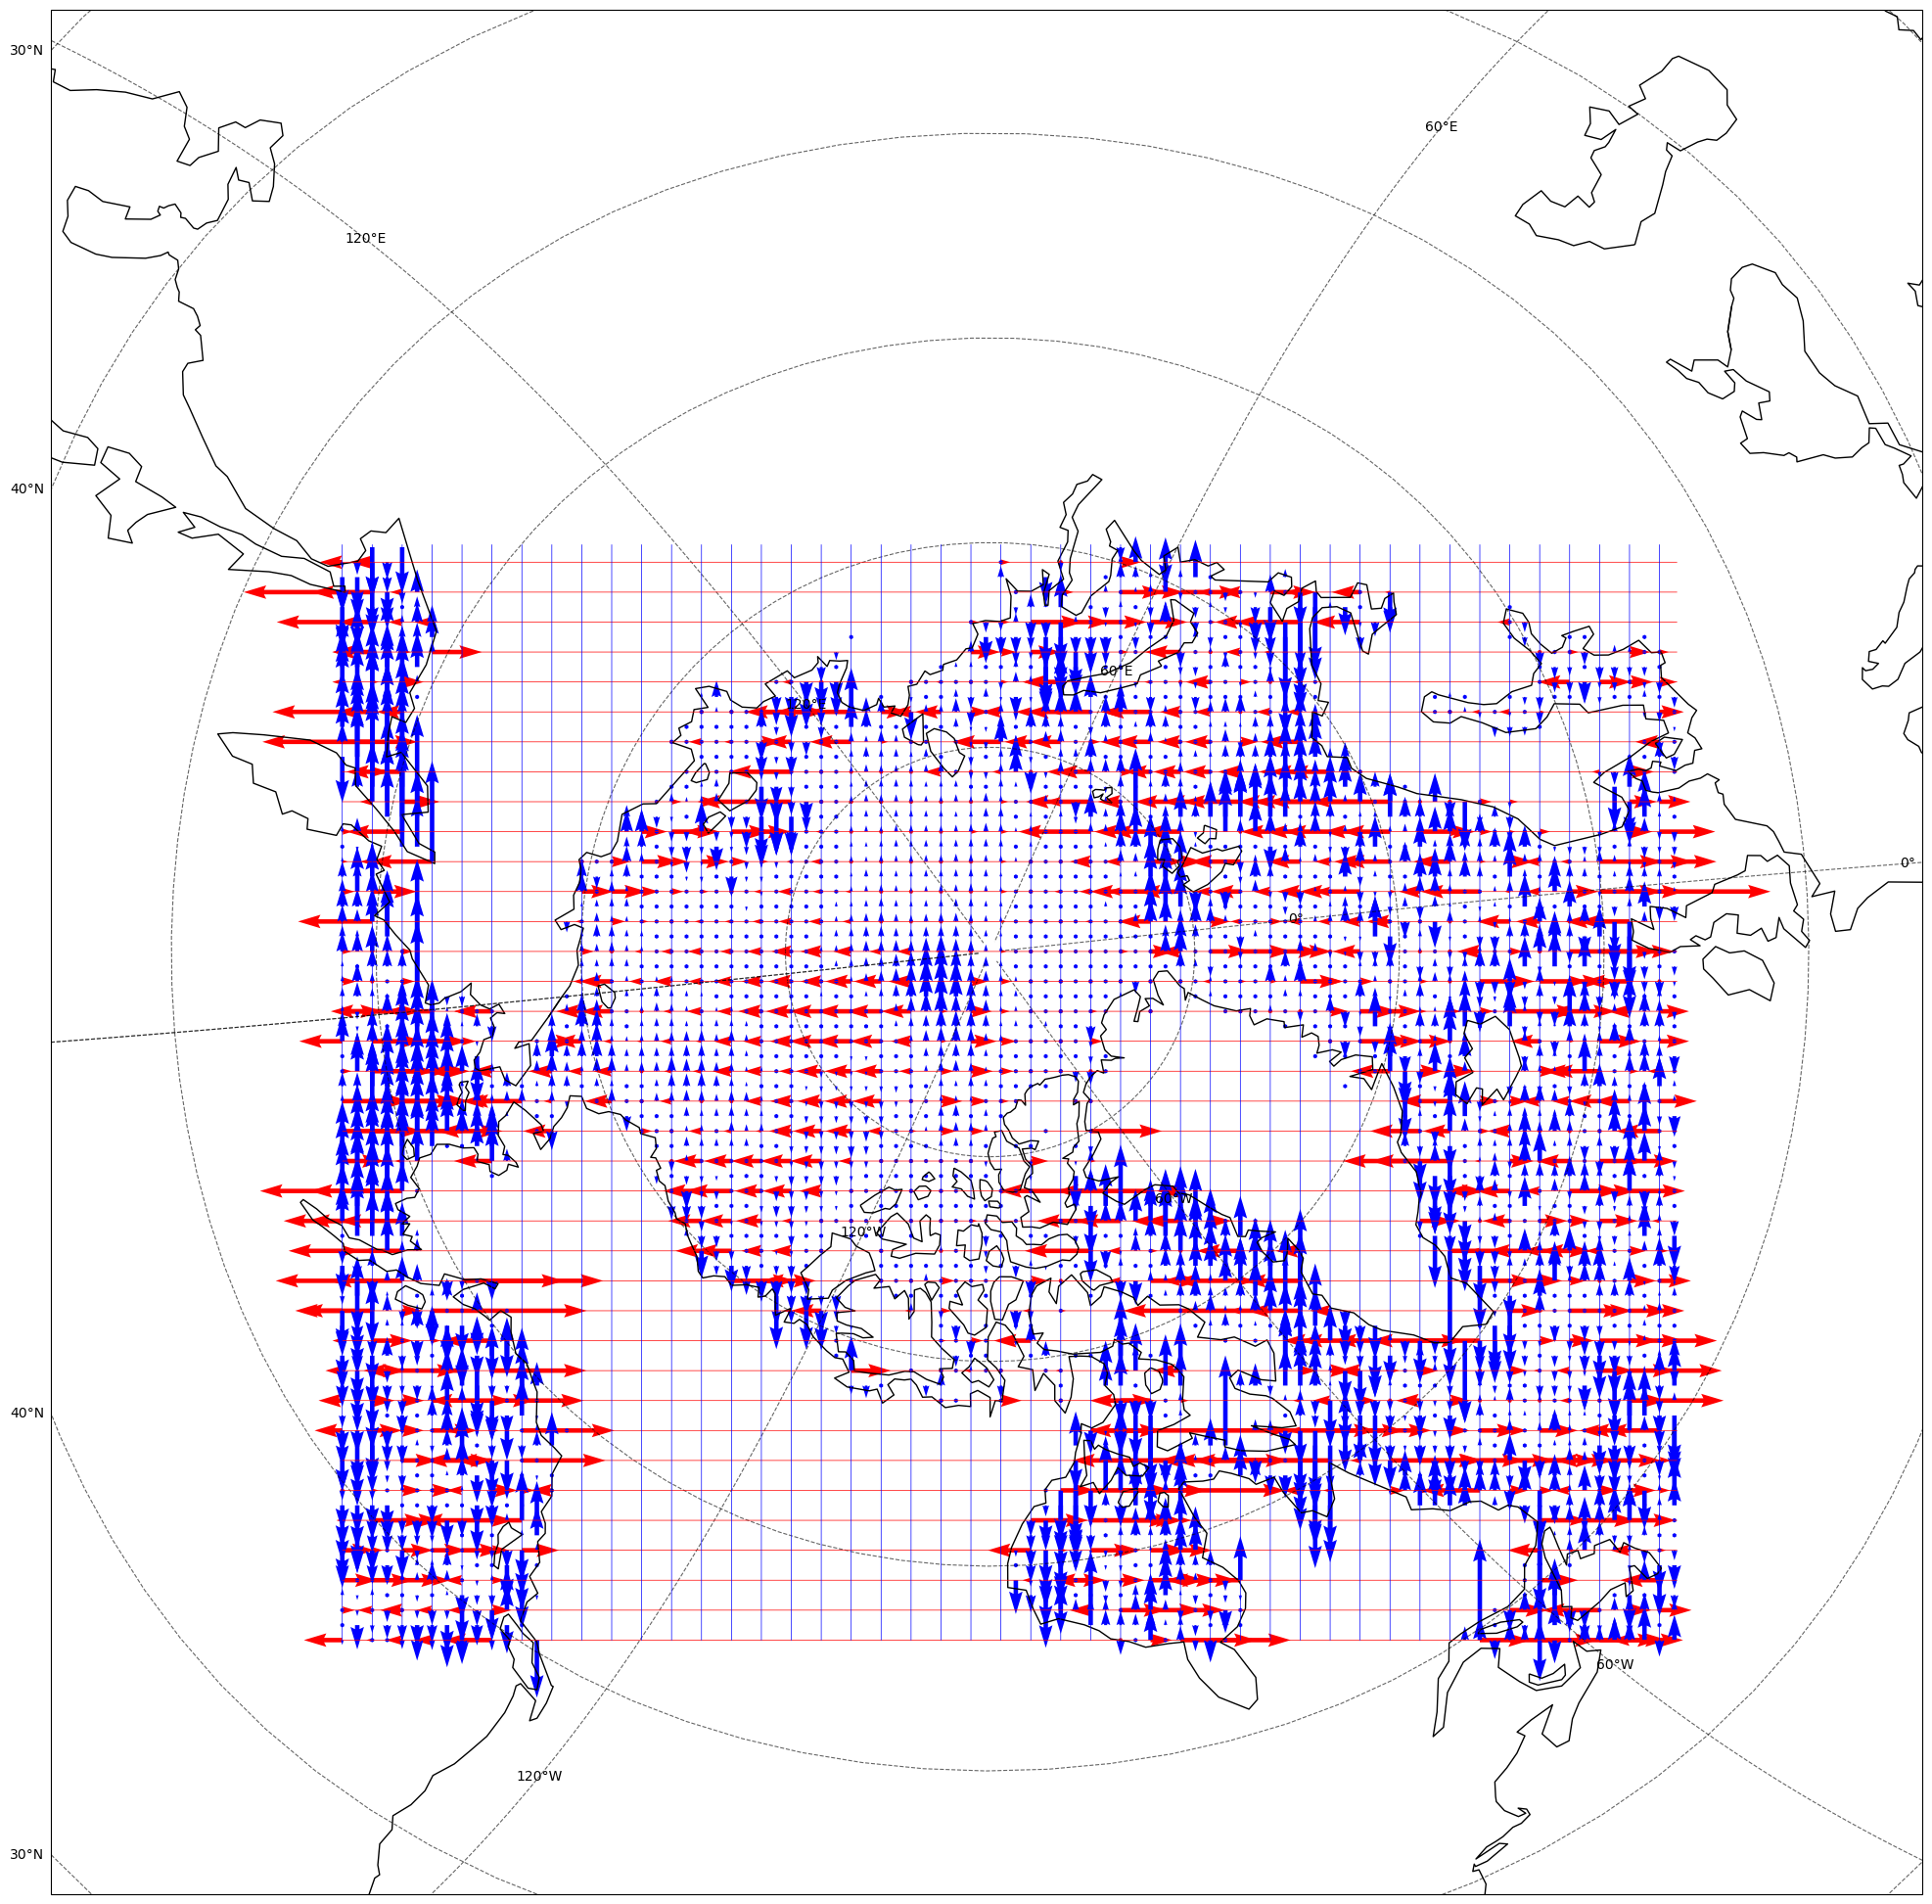

In [10]:
step = 50
plt.figure(figsize=(25, 25))
ax = plt.axes(projection=proj)
ax.coastlines()
# ax.set_extent([-60, -50, 45, 55], crs=ccrs.PlateCarree())
# ax.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax.set_extent(
    [
        x_vel.longitude.data.min(),
        x_vel.longitude.data.max(),
        x_vel.latitude.data.min(),
        x_vel.latitude.data.max(),
    ],
    crs=ccrs.PlateCarree(),
)
gridliner = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), color="k", alpha=0.6, linestyle="--"
)
gridliner.top_labels = False
gridliner.right_labels = False

n_y, n_x = grid_x.shape
for n in range(0, n_y, step):
    plt.plot(grid_x[n], grid_y[n], zorder=10, linewidth=0.5, color="red")

for n in range(0, n_x, step):
    plt.plot(grid_x[:,n], grid_y[:, n], zorder=10, linewidth=0.5, color="blue")

ax.quiver(
    grid_x[::step,::step],
    grid_y[::step,::step],
    np.deg2rad(x_vel.vozocrtx.data[0,::step,::step]),
    np.deg2rad(y_vel.vomecrty.data[0,::step,::step])*0.0,
    transform=proj,
    color="red"
)

ax.quiver(
    grid_x[::25,::25],
    grid_y[::25,::25],
    np.deg2rad(x_vel.vozocrtx.data[0,::25,::25])*0.0,
    np.deg2rad(y_vel.vomecrty.data[0,::25,::25]),
    transform=proj,
    color="blue"
)    

plt.show()

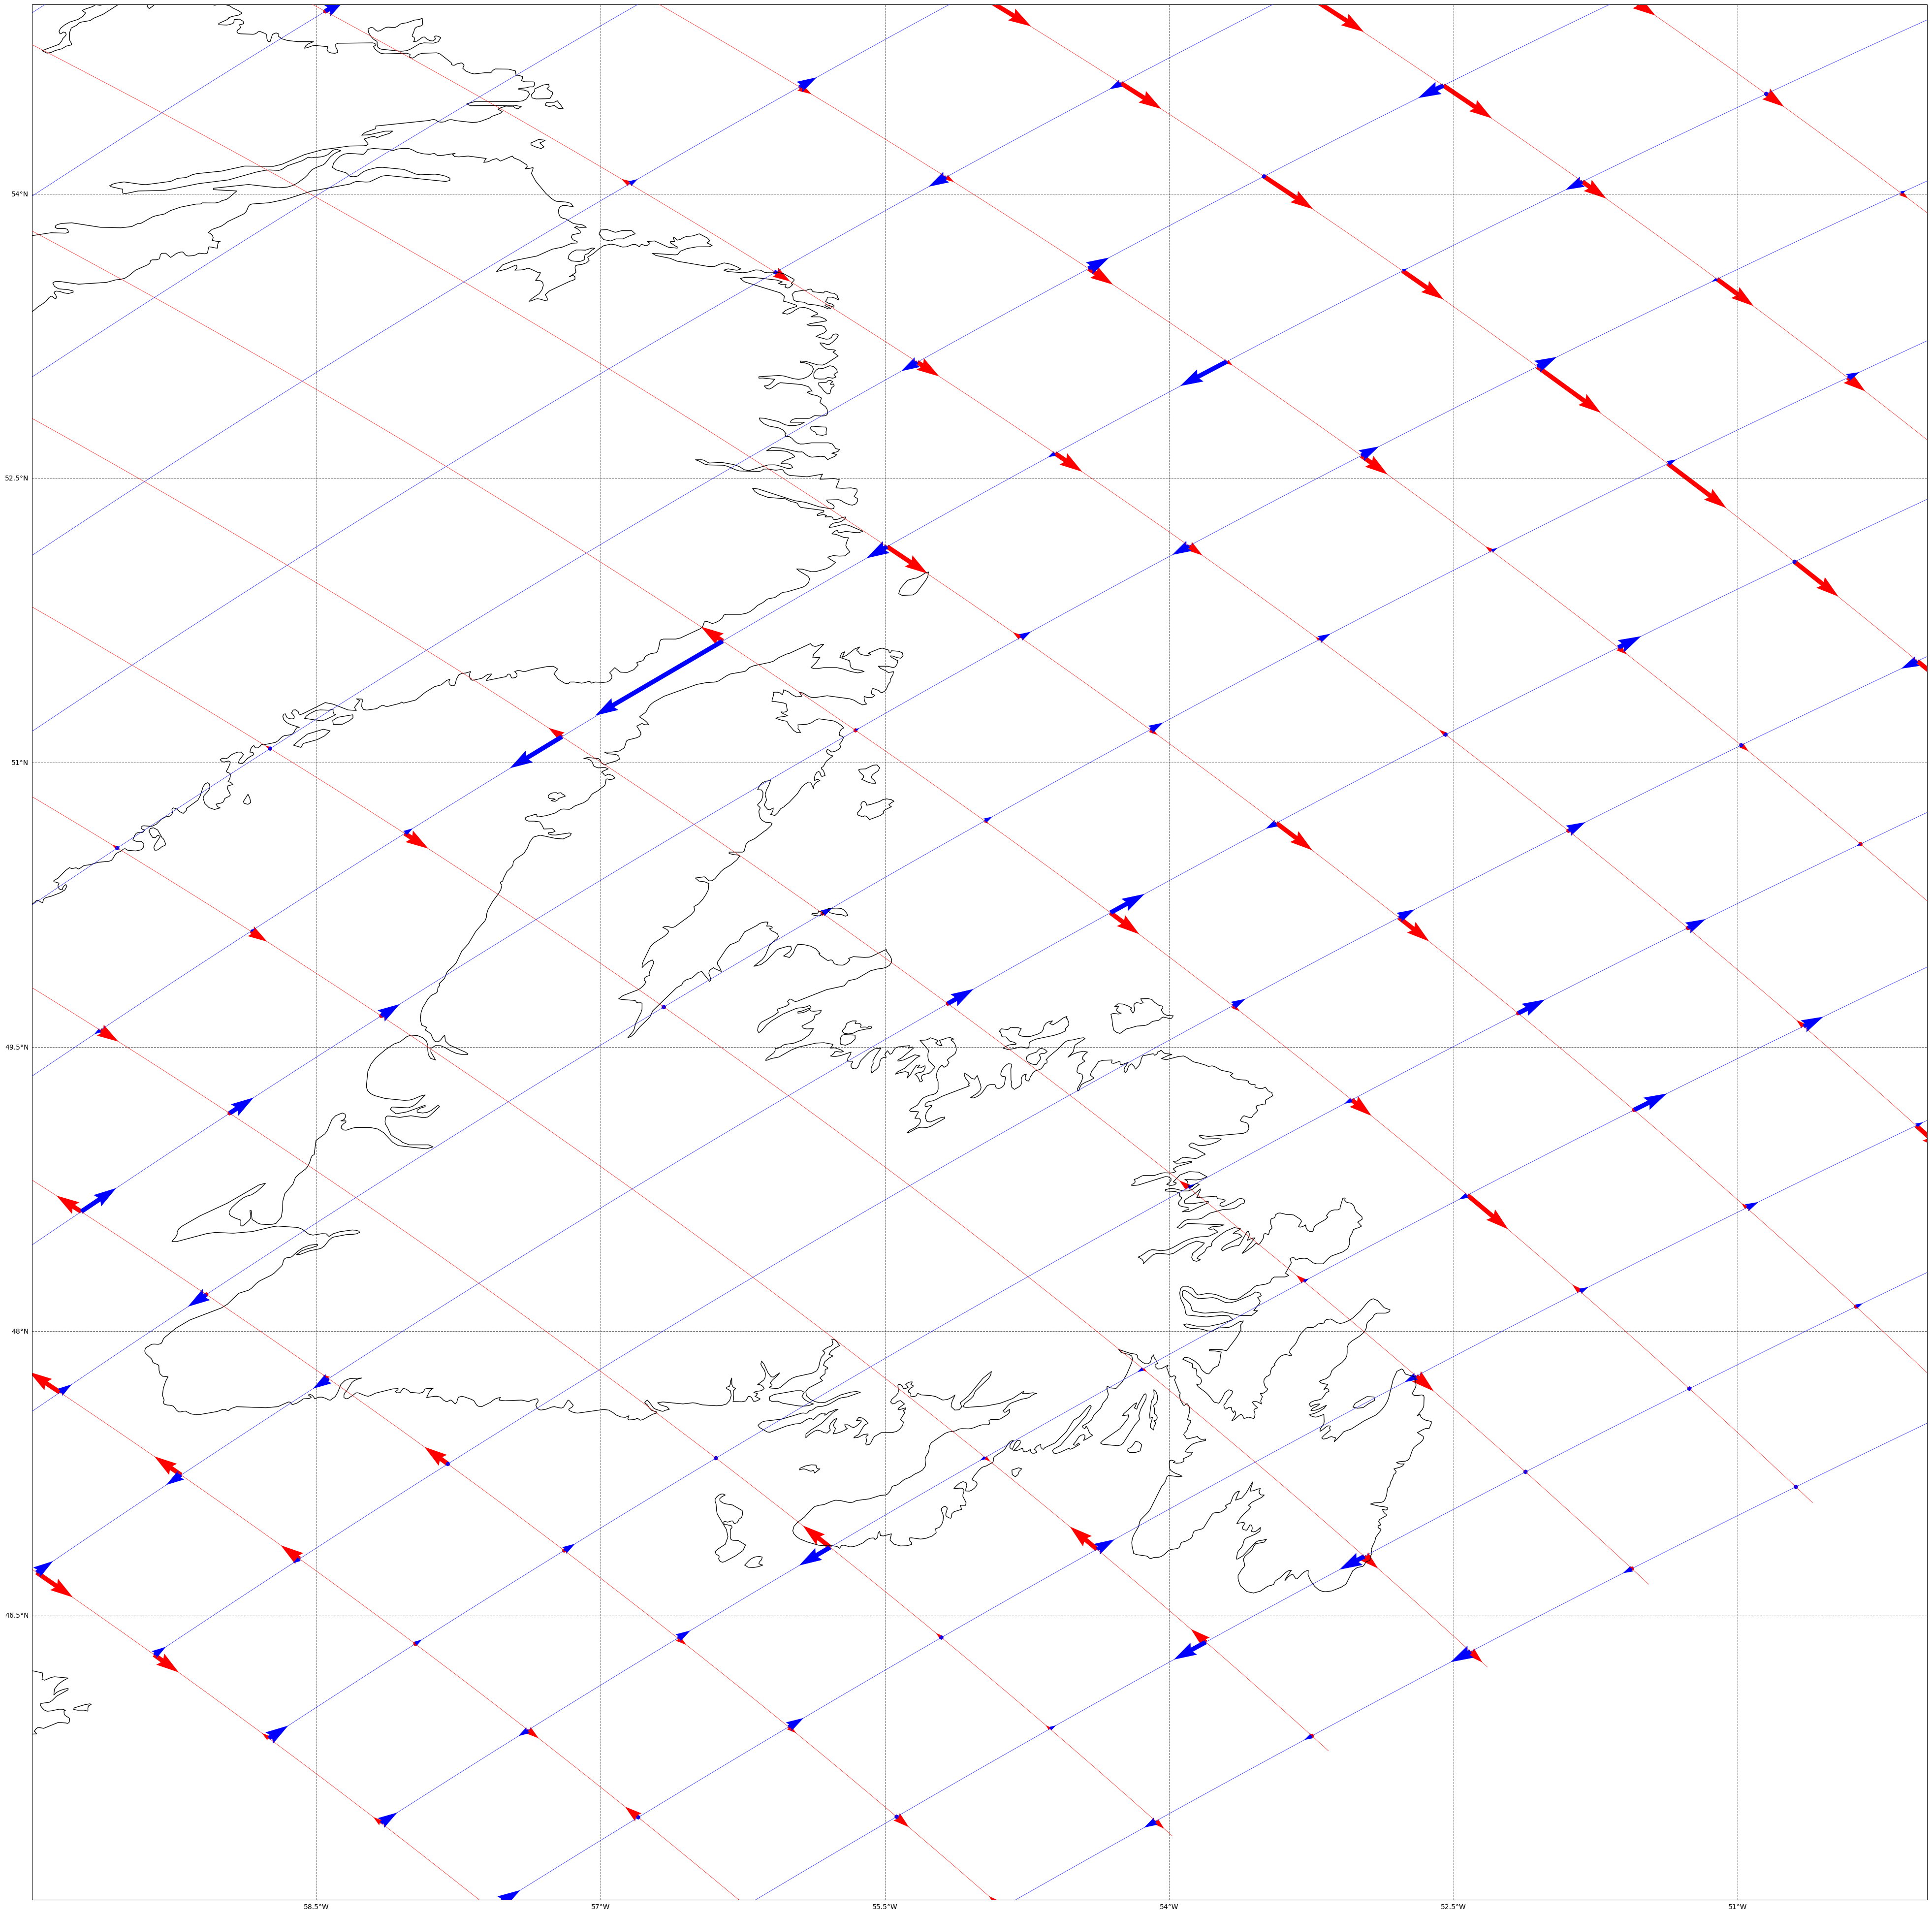

In [11]:
step=25
plt.figure(figsize=(50, 50))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-60, -50, 45, 55], crs=ccrs.PlateCarree())
# ax.set_extent(
#     [
#         x_vel.longitude.data.min(),
#         x_vel.longitude.data.max(),
#         x_vel.latitude.data.min(),
#         x_vel.latitude.data.max(),
#     ],
#     crs=ccrs.PlateCarree(),
# )
gridliner = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), color="k", alpha=0.6, linestyle="--"
)
gridliner.top_labels = False
gridliner.right_labels = False

n_y, n_x = grid_x.shape
for n in range(0, n_y, step):
    plt.plot(lon[n], lat[n], zorder=10, linewidth=0.5, color="red")

for n in range(0, n_x, step):
    plt.plot(lon[:,n], lat[:, n], zorder=10, linewidth=0.5, color="blue")

ax.quiver(
    grid_x[::step,::step],
    grid_y[::step,::step],
    np.deg2rad(x_vel.vozocrtx.data[0,::step,::step]),
    np.deg2rad(y_vel.vomecrty.data[0,::step,::step])*0.0,
    transform=proj,
    color="red"
)

ax.quiver(
    grid_x[::25,::25],
    grid_y[::25,::25],
    np.deg2rad(x_vel.vozocrtx.data[0,::25,::25])*0.0,
    np.deg2rad(y_vel.vomecrty.data[0,::25,::25]),
    transform=proj,
    color="blue"
)

plt.show()

## Grid Transform

### Method 1

In [12]:
lat_0 = np.deg2rad(x_vel.latitude.data[1:-1, :-2])
lat_1 = np.deg2rad(x_vel.latitude.data[1:-1:, 1:-1])

lon_0 = np.deg2rad(x_vel.longitude.data[1:-1, :-2])
lon_1 = np.deg2rad(x_vel.longitude.data[1:-1:, 1:-1])

gsint = np.zeros(x_vel.latitude.shape)
gcost = np.zeros(x_vel.latitude.shape)

zxnpt = 0.0 - 2.0 * np.cos(lon_1) * np.tan(
    np.pi / 4.0 - lat_1 / 2.0
)
zynpt = 0.0 - 2.0 * np.sin(lon_1) * np.tan(
    np.pi / 4.0 - lat_1 / 2.0
)
znnpt = zxnpt * zxnpt + zynpt * zynpt

zxuut = 2.0 * np.cos(lon_1) * np.tan(
    np.pi / 4.0 - lat_1 / 2.0
) - 2.0 * np.cos(lon_0) * np.tan(np.pi / 4.0 - lat_0 / 2.0)
zyuut = 2.0 * np.sin(lon_1) * np.tan(
    np.pi / 4.0 - lat_1 / 2.0
) - 2.0 * np.sin(lon_0) * np.tan(np.pi / 4.0 - lat_0 / 2.0)
znuut = np.sqrt(znnpt * (zxuut * zxuut + zyuut * zyuut))
# znuut[znuut < 1.0e-14] = 1.0e-14
# znuut = max(znuut, 1.0e-14)

idx = np.argwhere(znuut< 1.0e-14)
znuut[idx] = 1.0e-14

gsint[1:-1, 1:-1] = (zxnpt * zxuut + zynpt * zyuut) / znuut
gcost[1:-1, 1:-1] = -(zxnpt * zyuut - zynpt * zxuut) / znuut

for var in [gsint, gcost]:
    var[:, 0] = var[:, 1]
# Last row copied from second last row
for var in [gsint, gcost]:
    var[:, -1] = var[:, -2]
# First column copied from second column
for var in [gsint, gcost]:
    var[0, :] = var[1, :]
# Last column copied from second last column
for var in [gsint, gcost]:
    var[-1, :] = var[-2, :]

In [13]:
theta1 = np.rad2deg(np.arctan2(gsint, gcost))
theta1

array([[  48.05671309,   48.05671309,   48.04773621, ...,  -50.10623217,
         -50.12409112,  -50.12409112],
       [  48.05671309,   48.05671309,   48.04773621, ...,  -50.10623217,
         -50.12409112,  -50.12409112],
       [  48.08760212,   48.08760212,   48.06317007, ...,  -50.11497472,
         -50.16448722,  -50.16448722],
       ...,
       [ 118.85730161,  118.85730161,  118.88315651, ..., -117.146917  ,
        -117.12030438, -117.12030438],
       [ 118.87603066,  118.87603066,  118.91653827, ..., -117.17936878,
        -117.15276212, -117.15276212],
       [ 118.87603066,  118.87603066,  118.91653827, ..., -117.17936878,
        -117.15276212, -117.15276212]])

In [14]:
east_vel1 = x_vel.vozocrtx.data[0,:,:] * gcost - y_vel.vomecrty.data[0,:,:] * gsint
north_vel1 = x_vel.vozocrtx.data[0,:,:] * gsint + y_vel.vomecrty.data[0,:,:] * gcost

### Method 2

In [15]:
start = np.array([
    x_vel.longitude.data[:, :-1].flatten(),
    x_vel.latitude.data[:, :-1].flatten()
]).transpose()
end = np.array([
    x_vel.longitude.data[:, 1:].flatten(),
    x_vel.latitude.data[:, 1:].flatten()
]).transpose()

geod = cgeo.Geodesic(radius=6371229.0)
azimuth = geod.inverse(start, end)

In [16]:
theta2 = (90 - azimuth[:,2]).reshape((1830, 2229))
theta2 = np.append(theta2, theta2[:,-1].reshape(1830,1), axis=1)

In [ ]:
theta2[theta2>180] = theta2[theta2>=180] - 360

In [18]:
sin = np.rad2deg(np.sin(np.deg2rad(theta2)))
cos = np.rad2deg(np.cos(np.deg2rad(theta2)))

In [19]:
east_vel2 = x_vel.vozocrtx.data[0,:,:] * cos - y_vel.vomecrty.data[0,:,:] * sin
north_vel2 = x_vel.vozocrtx.data[0,:,:] * sin + y_vel.vomecrty.data[0,:,:] * cos

### Method 3

## Evaluation

In [64]:
north_vel2

array([[-7.31881866, -7.1299395 , -6.867495  , ..., 11.10534086,
        11.77913903, 12.29886872],
       [-7.1833079 , -6.92670611, -6.63015561, ..., 10.97157822,
        11.64311792, 12.33397609],
       [-6.982912  , -6.69165997, -6.39022476, ..., 10.77454323,
        11.5098089 , 12.18487692],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

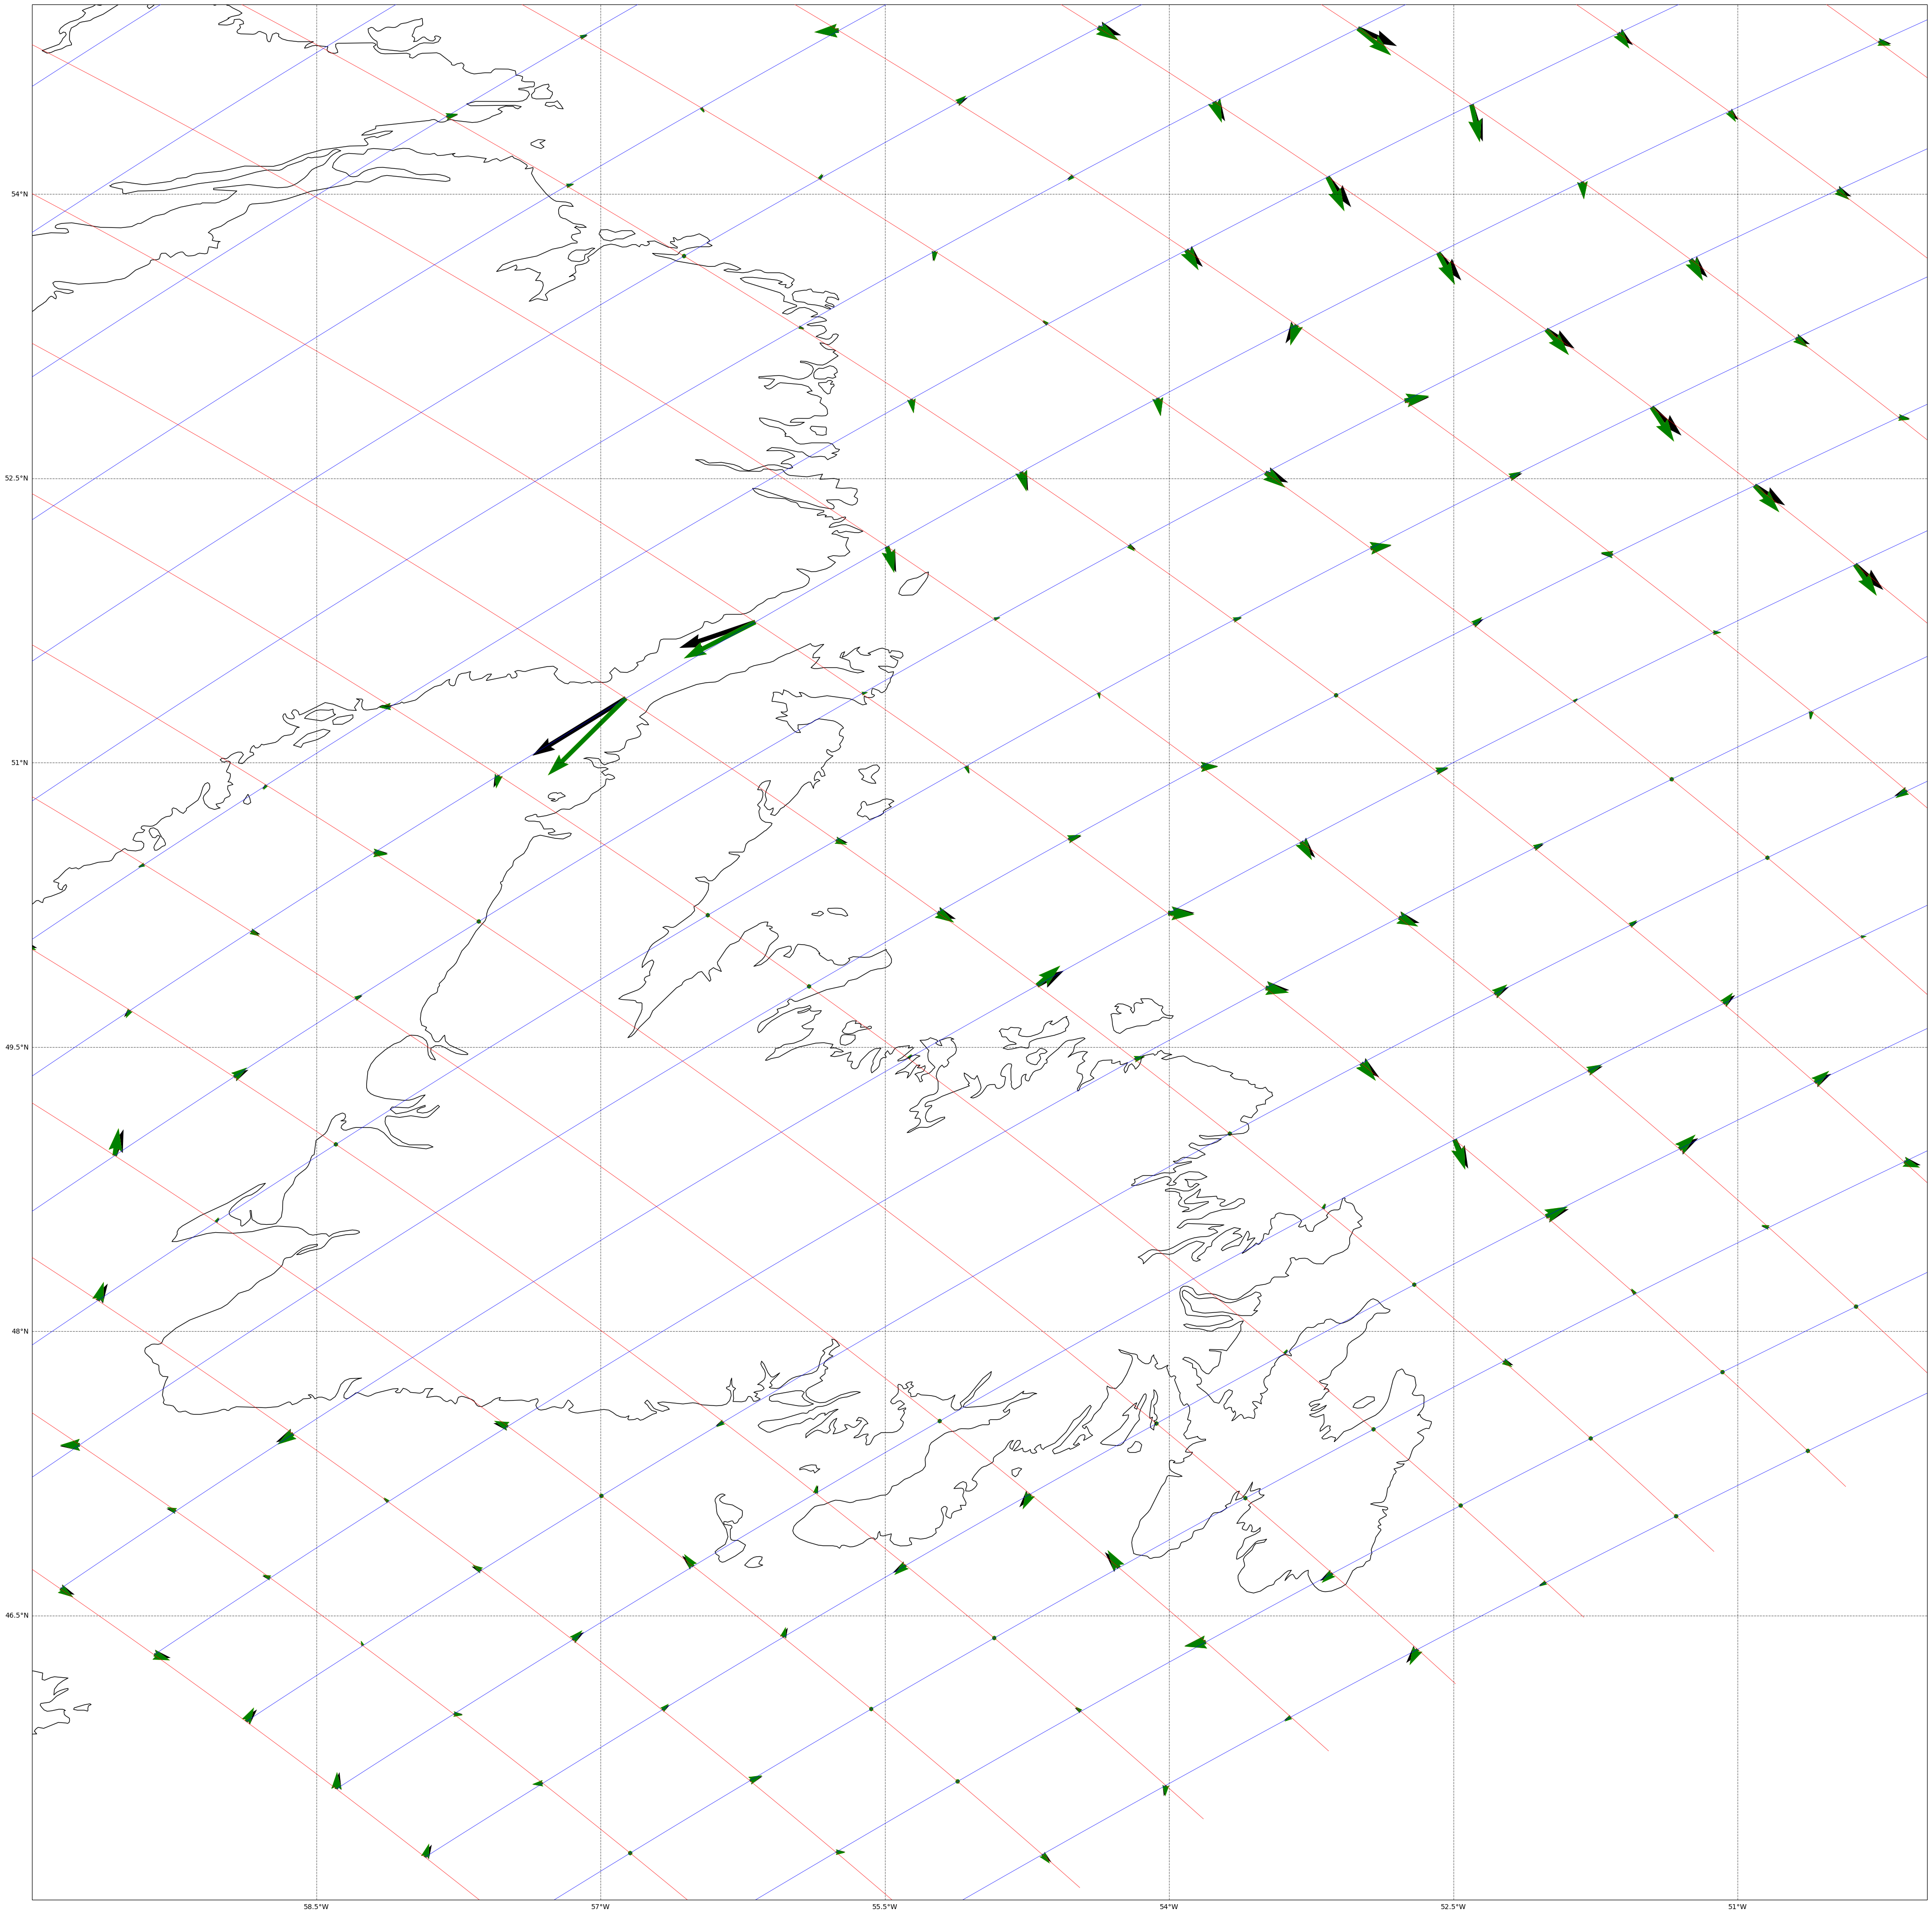

In [20]:
step=20
plt.figure(figsize=(50, 50))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-60, -50, 45, 55], crs=ccrs.PlateCarree())
# ax.set_extent(
#     [
#         x_vel.longitude.data.min(),
#         x_vel.longitude.data.max(),
#         x_vel.latitude.data.min(),
#         x_vel.latitude.data.max(),
#     ],
#     crs=ccrs.PlateCarree(),
# )
gridliner = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), color="k", alpha=0.6, linestyle="--"
)
gridliner.top_labels = False
gridliner.right_labels = False

n_y, n_x = grid_x.shape
for n in range(0, n_y, step):
    plt.plot(lon[n], lat[n], zorder=10, linewidth=0.5, color="red")

for n in range(0, n_x, step):
    plt.plot(lon[:,n], lat[:, n], zorder=10, linewidth=0.5, color="blue")

ax.quiver(
    grid_x[::step,::step],
    grid_y[::step,::step],
    np.deg2rad(x_vel.vozocrtx.data[0,::step,::step]),
    np.deg2rad(y_vel.vomecrty.data[0,::step,::step]),
    transform=proj,
    color="black"
)

ax.quiver(
    lon[::step,::step],
    lat[::step,::step],
    np.deg2rad(east_vel1[::step,::step]),
    np.deg2rad(north_vel1[::step,::step]),
    transform=ccrs.PlateCarree(),
    color="yellow"
)

ax.quiver(
    lon[::step,::step],
    lat[::step,::step],
    np.deg2rad(east_vel2[::step,::step]),
    np.deg2rad(north_vel2[::step,::step]),
    transform=ccrs.PlateCarree(),
    color="green"
)


plt.show()

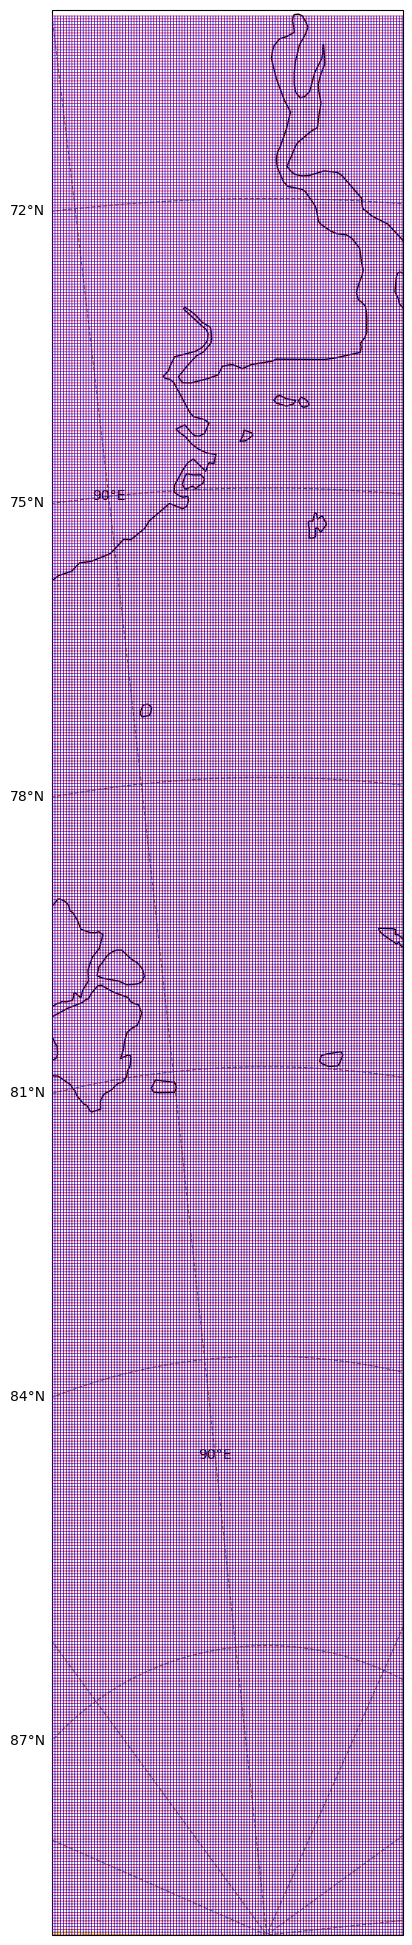

In [35]:
step = 1
plt.figure(figsize=(25, 25))
ax = plt.axes(projection=proj)
ax.coastlines()
# ax.set_extent([-60, -50, 45, 55], crs=ccrs.PlateCarree())
ax.set_extent([80, 90, 70, 90], crs=ccrs.PlateCarree())
# ax.set_extent(
#     [
#         x_vel.longitude.data.min(),
#         x_vel.longitude.data.max(),
#         x_vel.latitude.data.min(),
#         x_vel.latitude.data.max(),
#     ],
#     crs=ccrs.PlateCarree(),
# )
gridliner = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), color="k", alpha=0.6, linestyle="--"
)
gridliner.top_labels = False
gridliner.right_labels = False

n_y, n_x = grid_x.shape
for n in range(0, n_y, step):
    plt.plot(grid_x[n], grid_y[n], zorder=10, linewidth=0.5, color="red")

for n in range(0, n_x, step):
    plt.plot(grid_x[:,n], grid_y[:, n], zorder=10, linewidth=0.5, color="blue")


ax.quiver(
    grid_x[::step,::step],
    grid_y[::step,::step],
    np.deg2rad(x_vel.vozocrtx.data[0,::step,::step]),
    np.deg2rad(y_vel.vomecrty.data[0,::step,::step]),
    transform=proj,
    color="black"
)

ax.quiver(
    lon[::step,::step],
    lat[::step,::step],
    np.deg2rad(east_vel1[::step,::step]),
    np.deg2rad(north_vel1[::step,::step]),
    transform=ccrs.PlateCarree(),
    color="yellow"
)

ax.quiver(
    lon[::step,::step],
    lat[::step,::step],
    np.deg2rad(east_vel2[::step,::step]),
    np.deg2rad(north_vel2[::step,::step]),
    transform=ccrs.PlateCarree(),
    color="green"
)  

plt.show()

In [22]:
meanSquaredError = np.nanmean(((east_vel1 - east_vel2) ** 2))
rmse = np.sqrt(meanSquaredError)
rmse

114832560.74308904

In [23]:
theta1.shape

(1830, 2230)

In [40]:
np.argwhere((east_vel1 - east_vel2)==np.nanmax(east_vel1 - east_vel2))

array([[1082,  207]])

In [43]:
theta1[1082,  207]

85.92150169881141

In [45]:
gsint[1082,  207]

24385898496.0

In [46]:
gcost[1082,  207]

1738804736.0

In [44]:
theta2[1082,  207]

85.89861585801987

In [47]:
sin[1082,  207]

57.14904819687726

In [48]:
cos[1082,  207]

4.097882404699304

In [41]:
east_vel1[1082,  207]

17078659233.580444

In [42]:
east_vel2[1082,  207]

40.021293355541154

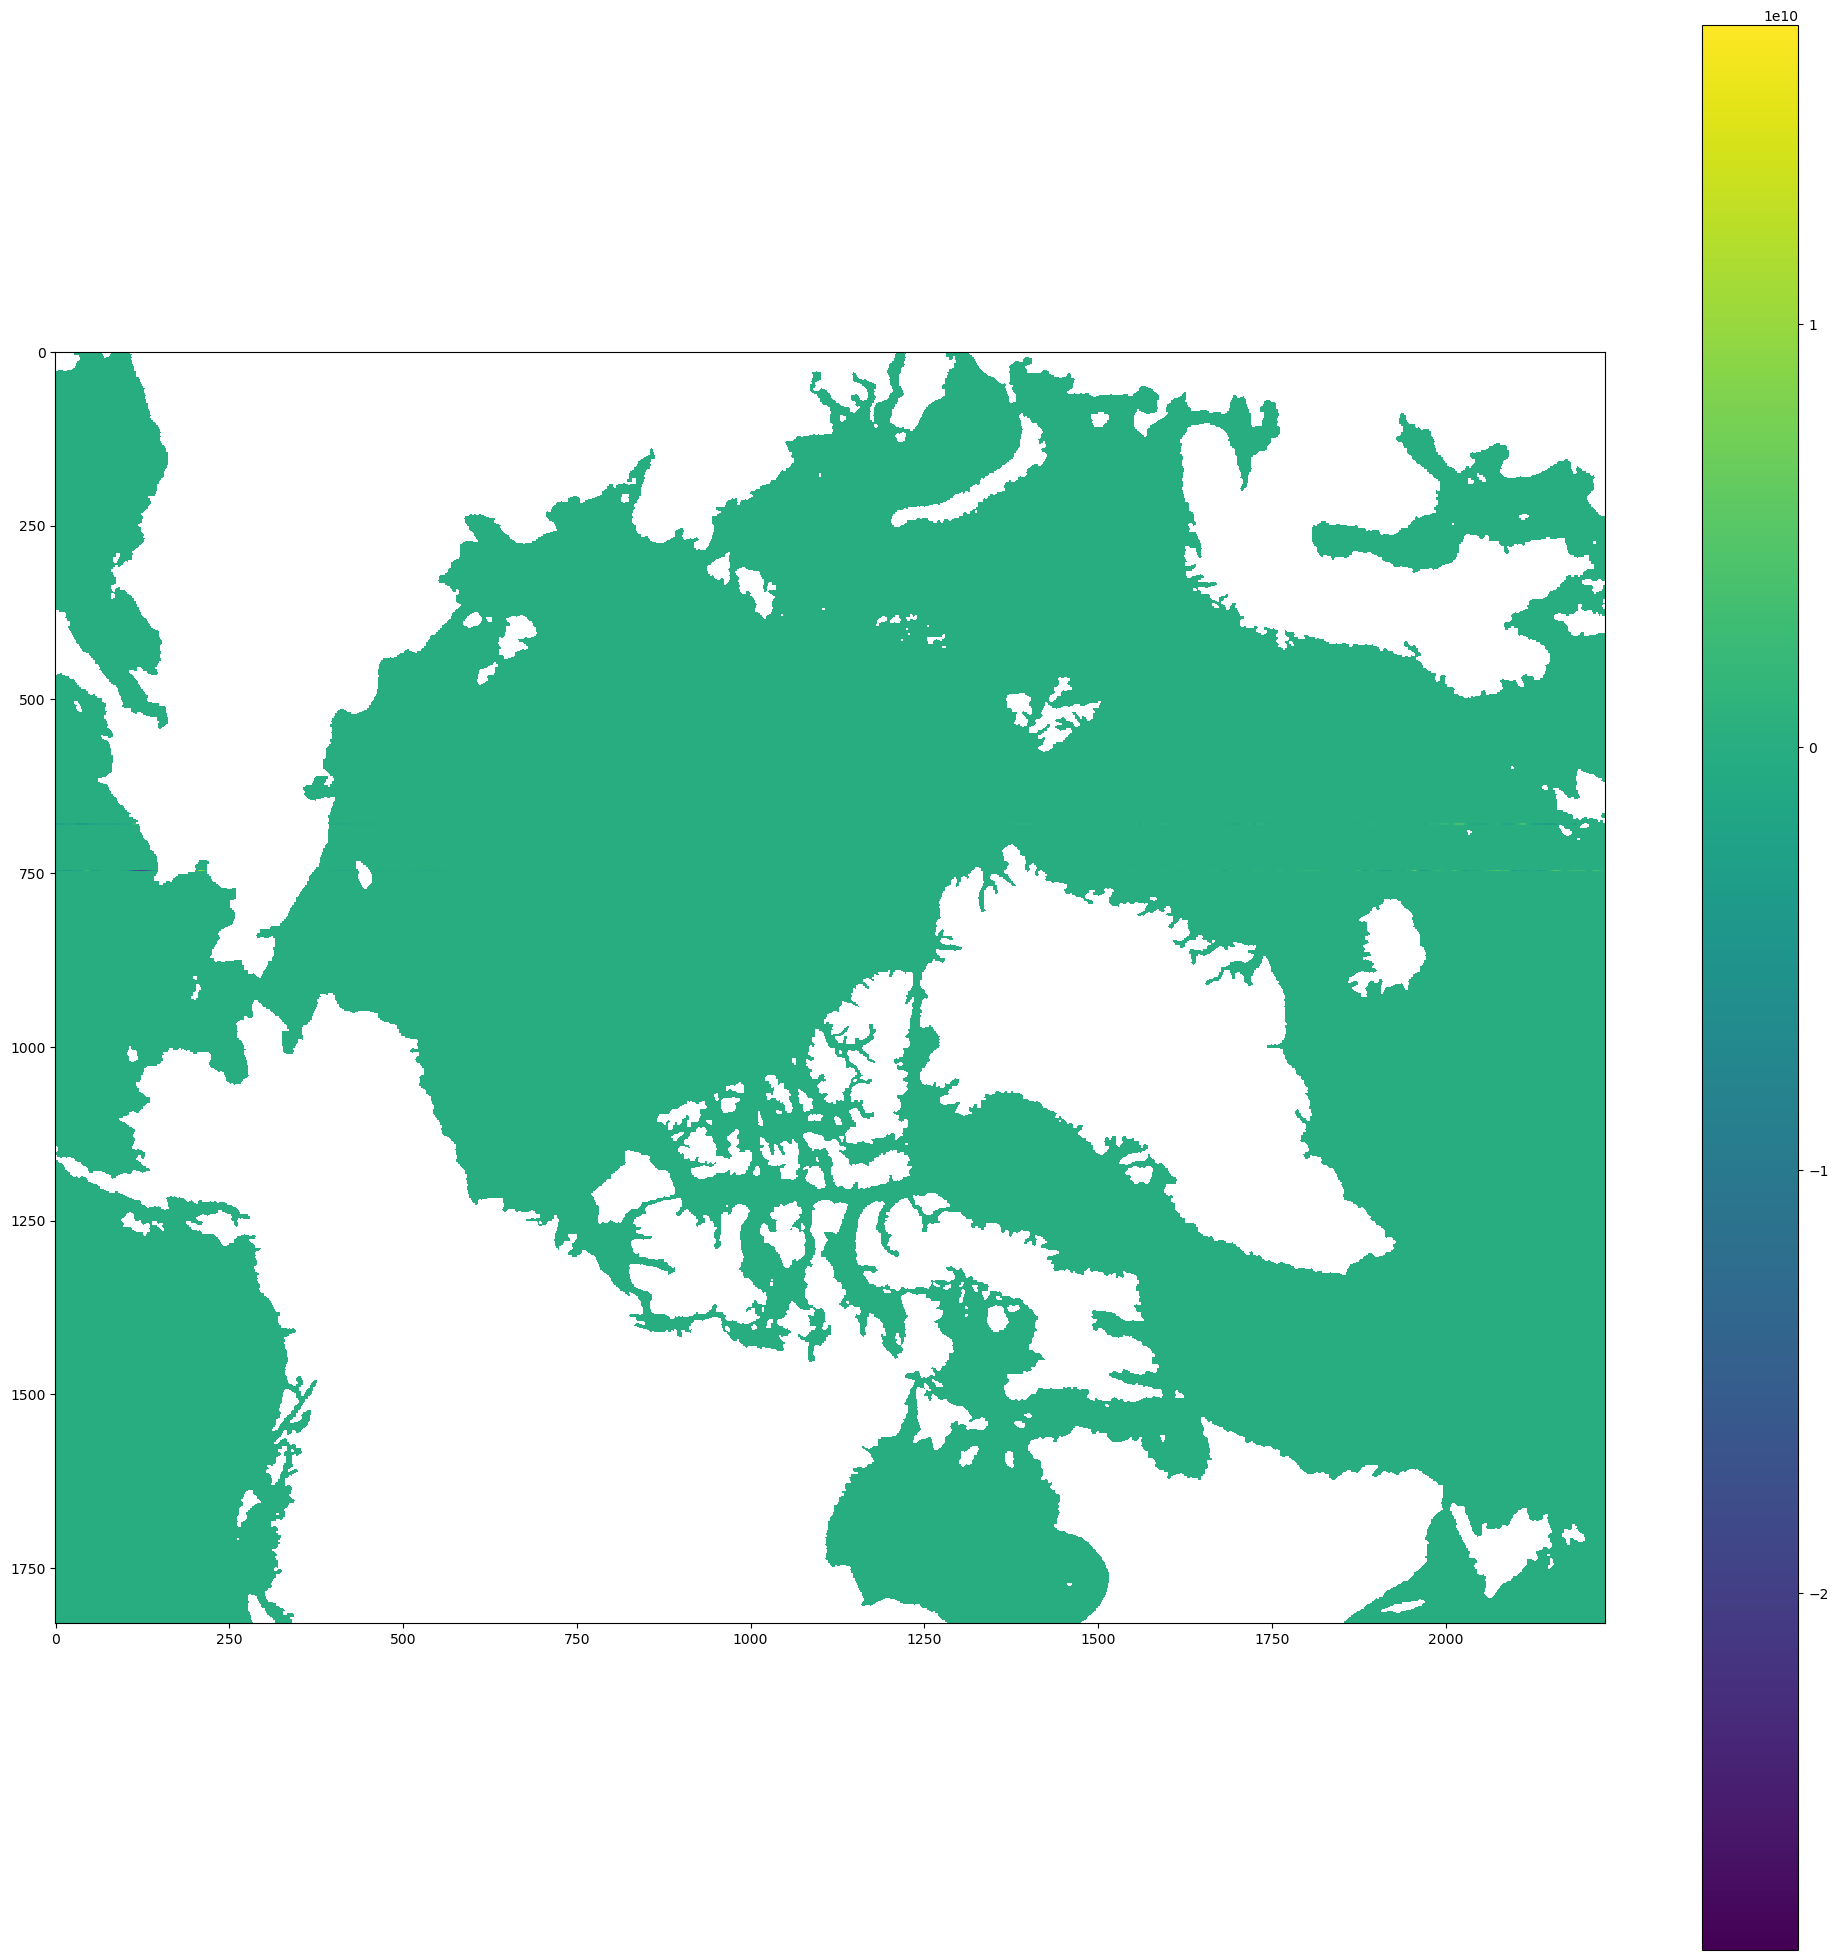

In [36]:
nan_idx = np.argwhere(np.isnan(x_vel.vozocrtx.data[0, :])).transpose()
diff = east_vel1 - east_vel2
diff[*nan_idx] = np.nan
plt.figure(figsize=(25, 25))
plt.imshow(np.flipud(diff))
plt.colorbar()